In [2]:
import pickle
import os
import re
import json
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from functools import reduce

In [39]:
# change if required
lmbda = [0.001, 0.01, 0.1]
rnd_seed = '01'
modelversion = "avg-ID-jointly"
l_n = [4, 5]

In [48]:
all_dirs = []
l_all_results = []
l_all_models = []

for n in l_n:
    for la in lmbda:
        results_dir_ID = os.path.join("./results", modelversion, f'{n}d', str(la), f'seed{rnd_seed}')
        all_dirs.append(results_dir_ID)
for d in all_dirs:
    file_path = os.path.join(d, 'results.json')
    if os.path.isfile(file_path):
        with open(file_path, "r") as f:
            l_results = json.load(f)
            l_all_results.append(l_results)
        
    else:
        print("not found")
    p = os.path.join(d, "model", 'model_epoch0004.tar')
    m = torch.load(p, weights_only=True)
    l_all_models.append(m)

In [55]:
l_df_train_eval = [
    pd.DataFrame({
        "ndim": l["n_embed"],
        "lambda": l["lambda"],
        "train_acc": l["train_accs"],
        "val_acc": l["val_accs"],
    })
    for l in l_all_models
]

In [56]:
df_train_eval = reduce(lambda x, y: pd.concat([x, y], axis=0, ignore_index=True), l_df_train_eval)

In [59]:
df_train_eval["epoch"] = df_train_eval.groupby(["ndim", "lambda"]).cumcount()

In [64]:
df_train_eval_long = pd.melt(
    df_train_eval, 
    id_vars=["ndim", "lambda", "epoch"], 
    value_vars = ["train_acc", "val_acc"], 
    var_name = "Variable",
    value_name = "Accuracy"
)

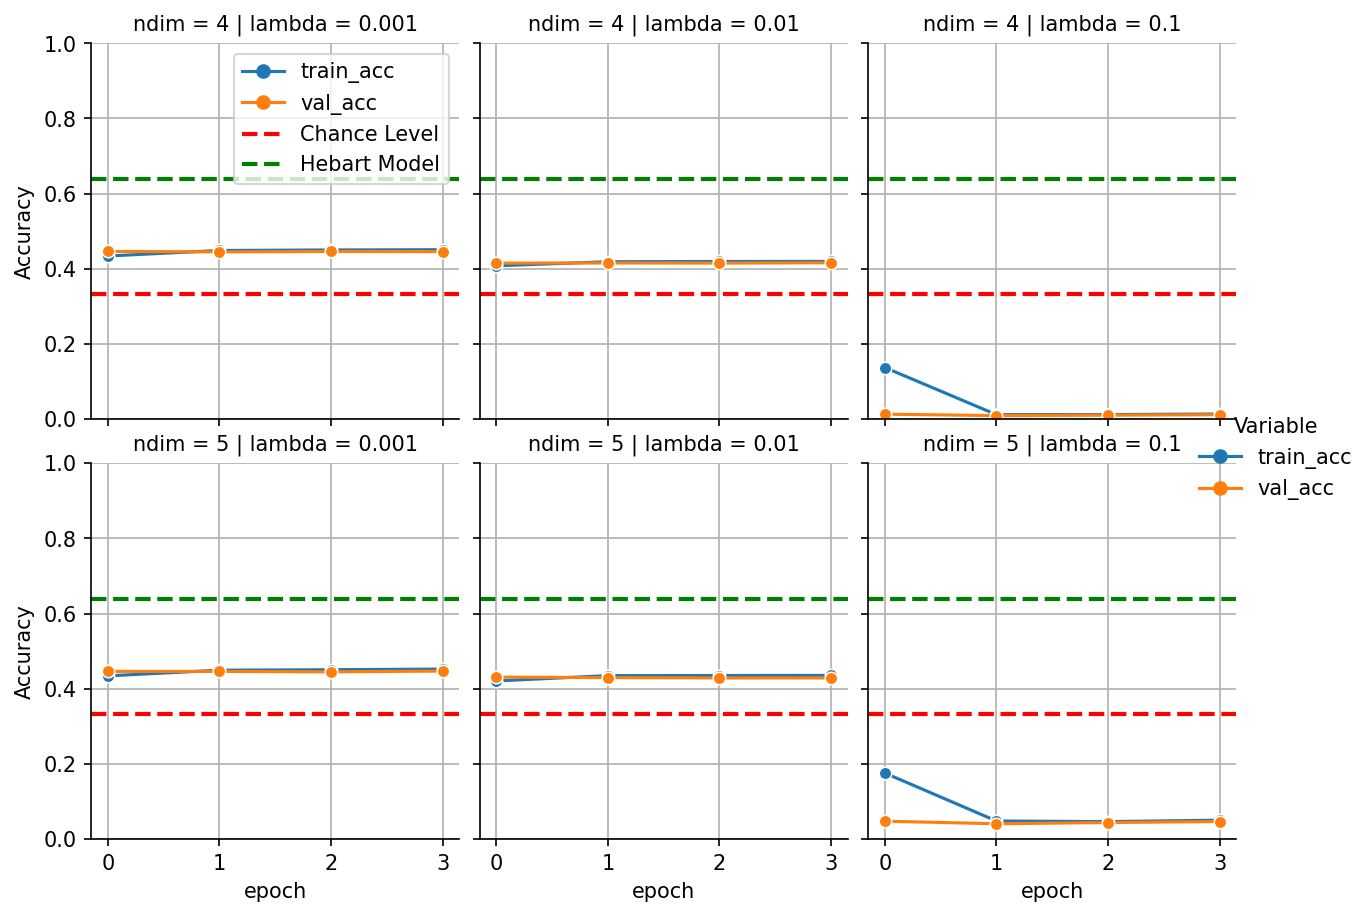

In [83]:
# Create the FacetGrid without specifying an external axis
g = sns.relplot(
    data=df_train_eval_long, x='epoch', y='Accuracy', 
    col='lambda', row="ndim", height=4, hue="Variable",
    marker="o", aspect=1, kind="line")
# Add gridlines to each facet 
for i, ax in enumerate(g.axes.flat): 
    ax.grid(True)
    ax.axhline(y=.33333, color='red', linestyle='--', linewidth=2, label='Chance Level')
    ax.axhline(y=.64, color='green', linestyle='--', linewidth=2, label='Hebart Model')
    
    #ax.set_xlim(0, 400)
    ax.set_ylim(0, 1)
    if i == 0:
        ax.legend()
    
# Adjust the plot size
g.fig.set_size_inches(9, 6)
g.fig.set_dpi(150)

plt.show()

In [91]:
import itertools

# Define the fixed parts of the dictionary
base_dict = {
    'rnd_seed': 1,
    'triplets_dir': './data/',
    "task": "odd_one_out",
    "learning_rate": .001,
    "epochs": 50,
    "steps": 10
}

# Define the variables and their possible values
lmbda_list = [0.001, 0.005, 0.0005]
embed_dim_list = [100, 200]
agreement_list = ["few", "many"]
sparsity_list = ["ID", "both"]

# Generate all combinations
combinations = list(itertools.product(lmbda_list, embed_dim_list, agreement_list, sparsity_list))

# Create the list of dictionaries
arg_combinations = []
for lmbda, embed_dim, agreement, sparsity in combinations:
    temp_dict = base_dict.copy()
    temp_dict.update({
        'lmbda': lmbda,
        'embed_dim': embed_dim,
        'agreement': agreement,
        'sparsity': sparsity,
        'loggername': f"lmbda={lmbda};embed_dim={embed_dim};agreement={agreement};sparsity={sparsity}"
    })
    arg_combinations.append(temp_dict)

# Print the result
for r in result:
    print(r)

{'rnd_seed': 1, 'triplets_dir': './data/', 'task': 'odd_one_out', 'learning_rate': 0.001, 'epochs': 50, 'steps': 10, 'lmbda': 0.001, 'embed_dim': 100, 'agreement': 'few', 'sparsity': 'ID', 'loggername': 'lmbda=0.001;embed_dim=100;agreement=few;sparsity=ID'}
{'rnd_seed': 1, 'triplets_dir': './data/', 'task': 'odd_one_out', 'learning_rate': 0.001, 'epochs': 50, 'steps': 10, 'lmbda': 0.001, 'embed_dim': 100, 'agreement': 'few', 'sparsity': 'both', 'loggername': 'lmbda=0.001;embed_dim=100;agreement=few;sparsity=both'}
{'rnd_seed': 1, 'triplets_dir': './data/', 'task': 'odd_one_out', 'learning_rate': 0.001, 'epochs': 50, 'steps': 10, 'lmbda': 0.001, 'embed_dim': 100, 'agreement': 'many', 'sparsity': 'ID', 'loggername': 'lmbda=0.001;embed_dim=100;agreement=many;sparsity=ID'}
{'rnd_seed': 1, 'triplets_dir': './data/', 'task': 'odd_one_out', 'learning_rate': 0.001, 'epochs': 50, 'steps': 10, 'lmbda': 0.001, 'embed_dim': 100, 'agreement': 'many', 'sparsity': 'both', 'loggername': 'lmbda=0.001;e

In [92]:
import subprocess
from concurrent.futures import ThreadPoolExecutor

import itertools

# Define the fixed parts of the dictionary
base_dict = {
    'rnd_seed': 1,
    'triplets_dir': './data/',
    "task": "odd_one_out",
    "learning_rate": .001,
    "epochs": 5,
    "steps": 2,
    "device": "cuda"
}

# Define the variables and their possible values
lmbda_list = [0.001]
embed_dim_list = [5]
agreement_list = ["few", "many"]
sparsity_list = ["ID"]

# Generate all combinations
combinations = list(itertools.product(
    lmbda_list, embed_dim_list, agreement_list, sparsity_list))

# Create the list of dictionaries
arg_combinations = []
for lmbda, embed_dim, agreement, sparsity in combinations:
    temp_dict = base_dict.copy()
    temp_dict.update({
        'lmbda': lmbda,
        'embed_dim': embed_dim,
        'agreement': agreement,
        'sparsity': sparsity,
        'loggername': f"lmbda={lmbda};embed_dim={embed_dim};agreement={agreement};sparsity={sparsity}"
    })
    arg_combinations.append(temp_dict)

# Path to the Python file you want to run
python_file = 'run-avg-ID-jointly.py'

# Function to run the command


def run_command(args):
    command = (
        f" python {python_file} --rnd_seed {args['rnd_seed']} \
        --loggername {args['loggername']} \
        --triplets_dir {args['triplets_dir']} \
        --task {args['task']} \
        --agreement {args['agreement']} \
        --sparsity {args['sparsity']} \
        --learning_rate {args['learning_rate']} \
        --lmbda {args['lmbda']} \
        --epochs {args['epochs']} \
        --steps {args['steps']} \
        --device {args['device']} \
        --embed_dim {args['embed_dim']} "
    )
    subprocess.run(command, shell=True)


for args in arg_combinations:
    print(args)

{'rnd_seed': 1, 'triplets_dir': './data/', 'task': 'odd_one_out', 'learning_rate': 0.001, 'epochs': 5, 'steps': 2, 'device': 'cuda', 'lmbda': 0.001, 'embed_dim': 5, 'agreement': 'few', 'sparsity': 'ID', 'loggername': 'lmbda=0.001;embed_dim=5;agreement=few;sparsity=ID'}
{'rnd_seed': 1, 'triplets_dir': './data/', 'task': 'odd_one_out', 'learning_rate': 0.001, 'epochs': 5, 'steps': 2, 'device': 'cuda', 'lmbda': 0.001, 'embed_dim': 5, 'agreement': 'many', 'sparsity': 'ID', 'loggername': 'lmbda=0.001;embed_dim=5;agreement=many;sparsity=ID'}
